# Navier-Stokes simulation in 2D
Currently only the simulation of a pressure driven lid is possible. This can be extended by adding more possibilities to the function 'set_BC'.

Iteration number: 1


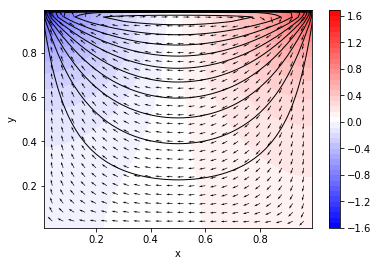

Iteration number: 50


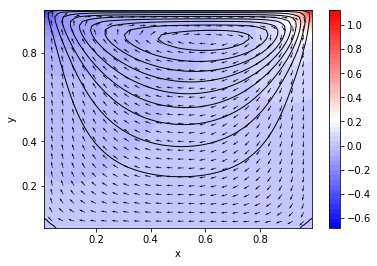

Iteration number: 100


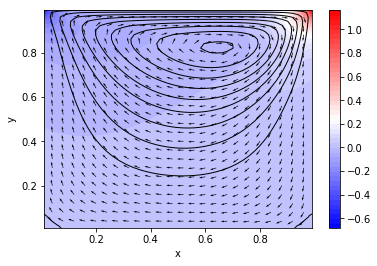

Iteration number: 150


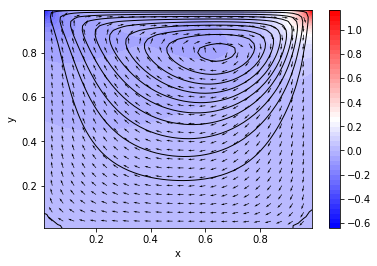

Iteration number: 200


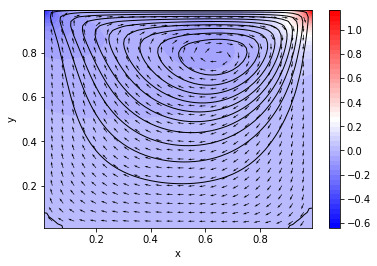

Iteration number: 250


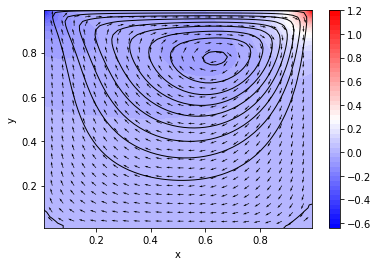

Iteration number: 300


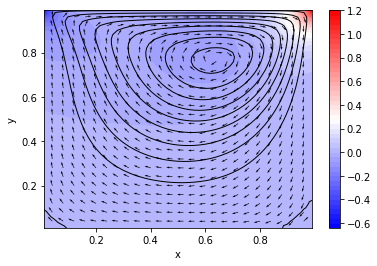

Iteration number: 350


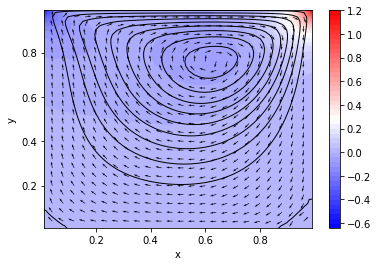

Iteration number: 400


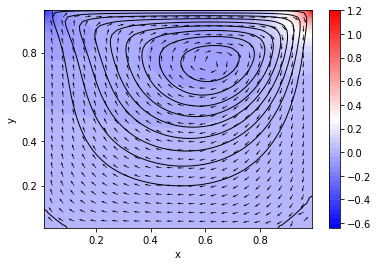

Iteration number: 400


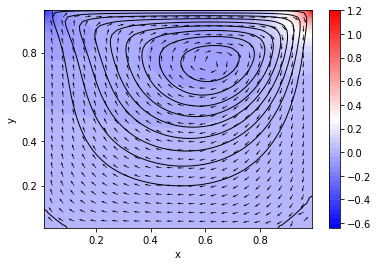

Maximum number of iterations (400) has been reached.
time 4.31 s


In [4]:
#%matplotlib notebook
import time
import numpy as np
import scipy as sci

from types import SimpleNamespace

from functions import *
from constants import *
from simulation import *

start_time = time.time()

# Initial conditions 
const = SimpleNamespace()

const.Re = 1e2      # Reynolds number
const.dt = 1e-2     # time step
const.tf = 4e0      # final time
const.nx = 50       # number of x-gridpoints
const.ny = 50       # number of y-gridpoints
const.nsteps = 10   # step interval for graphic output
const.lx = 1        # width of box
const.ly = 1        # height of box
    
const.rho_arrow = 20 # Density of arrows in quiver plot per unit length l

## Set other constants (incl. grid) which are determined by initial conditions specified above
const = constants(const)

# IC's
data = SimpleNamespace()
data = initialisation(const, data)

# BC's
## North, East, South, West
bc = SimpleNamespace()
bc = set_BC(const, bc, 'lid')

# Boundary matrices
const.Ubc , const.Vbc = set_BM(const, bc) # Maybe change const. to bc.

# Operator matrices on P, U, V, Q respectively
LP = SimpleNamespace()
LP = laplacian(const, LP)
LP = cholesky_decomposition(LP)

# Simulation
simulation_data = simulation(const, bc, LP, data)

end_time = time.time()
print('time', np.round(end_time - start_time,2), 's')